In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = sns.load_dataset('iris')
dataset.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [5]:
dataset['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
# Data Splitting
X = dataset[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
Y = dataset["species"]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=0)

In [14]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

In [15]:
modelKNN = KNeighborsClassifier(n_neighbors=5) 
# berapa banyak tetangga = 5 (default)
modelKNN.fit(X_train, Y_train)

KNeighborsClassifier()

In [18]:
# Akurasi train menggunakan KNN
modelKNN.score(X_train, Y_train)

0.95

In [19]:
# Akurasi test menggunakan KNN
modelKNN.score(X_test, Y_test)

0.9666666666666667

In [24]:
bunga = [[5.1 , 3.5 , 1.4 , 0.2]]

modelKNN.predict(bunga)

C:\Users\PC-01\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)

In [25]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [27]:
modelDT = DecisionTreeClassifier().fit(X_train,Y_train)

In [29]:
print(f'akurasi train decision tree : {modelDT.score(X_train, Y_train)}')
print(f'akurasi test decision tree : {modelDT.score(X_test, Y_test)}')

akurasi train decision tree : 1.0
akurasi test decision tree : 1.0


In [30]:
bunga = [[5.1 , 3.5 , 1.4 , 0.2]]

modelDT.predict(bunga)

C:\Users\PC-01\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)

In [31]:
from sklearn import tree

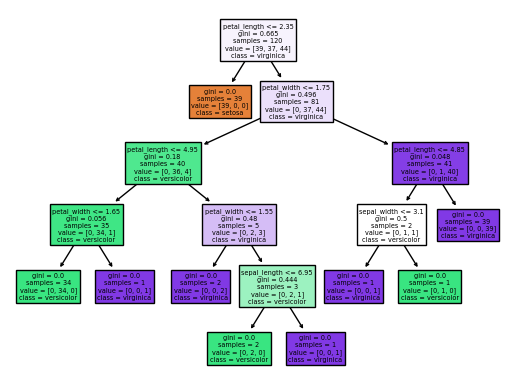

In [33]:
tree.plot_tree(modelDT,
               feature_names=X.columns,
               filled=True,
               class_names=Y.unique())
plt.show()

In [37]:
# Naive Baiyes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [35]:
modelGNB = GaussianNB().fit(X_train, Y_train)

In [36]:
predictGNB = modelGNB.predict(X_test)

In [38]:
accuracy_score(predictGNB, Y_test)

0.9666666666666667

In [39]:
# SVM
from sklearn.svm import SVC

In [40]:
modelSVC = SVC().fit(X_train, Y_train)
predictSVC = modelSVC.predict(X_test)

In [41]:
accuracy_score(predictSVC, Y_test)

1.0

In [42]:
# Linear Regression
from sklearn.linear_model import LinearRegression

In [51]:
x = dataset[['sepal_width']]
y = dataset['petal_width']

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,
                                                 random_state=0)

In [45]:
modelLR= LinearRegression().fit(x_train,y_train)

In [46]:
predictLR = modelLR.predict(x_test)

In [47]:
accuracy_score(y_test,predictLR)

ValueError: continuous is not supported

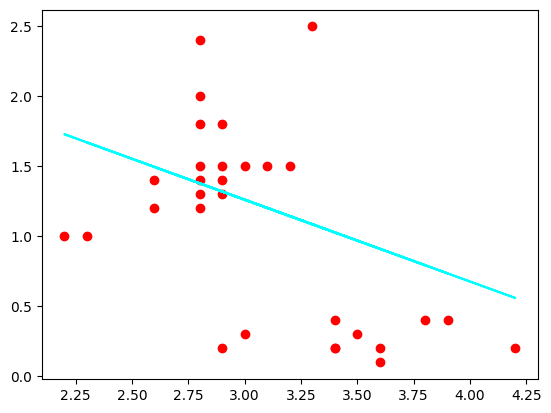

In [52]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test, predictLR, color='aqua')
plt.xticks()
plt.yticks()
plt.show()

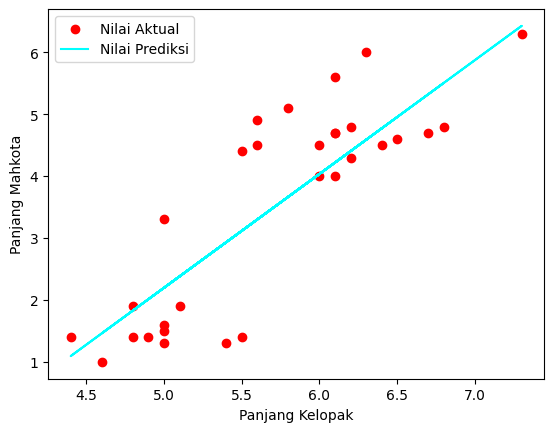

In [58]:
x = dataset[['sepal_length']]
y = dataset['petal_length']
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,
                                                 random_state=0)
modelLR= LinearRegression().fit(x_train,y_train)
predictLR = modelLR.predict(x_test)
plt.scatter(x_test,y_test,color='red', label = 'Nilai Aktual')
plt.plot(x_test, predictLR, color='aqua',label = 'Nilai Prediksi')
plt.xlabel('Panjang Kelopak')
plt.ylabel('Panjang Mahkota')
plt.legend()
plt.show()

In [59]:
# Evaluasi
# Confusion metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [61]:
cm_predict = modelKNN.predict(X_test)

In [63]:
cm = confusion_matrix(Y_test, cm_predict)

In [64]:
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

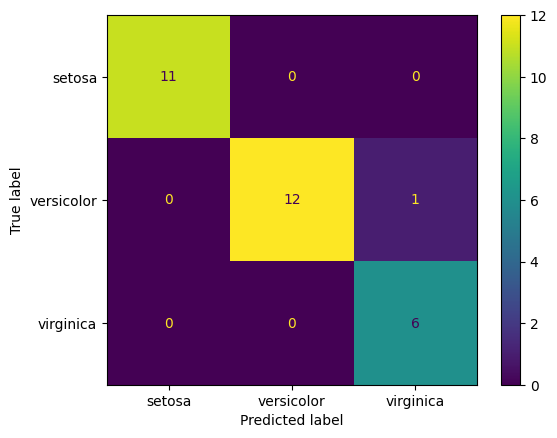

In [65]:
# visualisasi confusion matrix
disp_cm = ConfusionMatrixDisplay(confusion_matrix =cm,display_labels = modelKNN.classes_)
disp_cm.plot()
plt.grid(False)
plt.show()

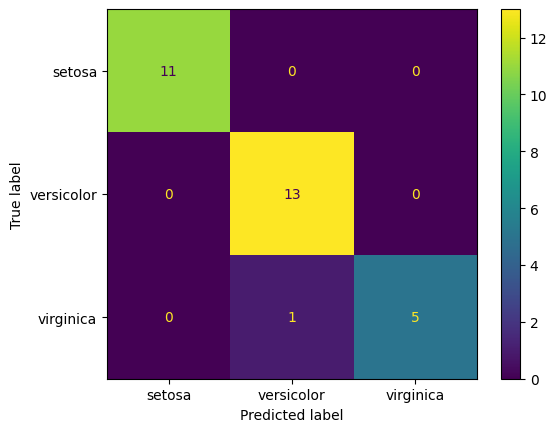

In [67]:
cm_predict2 = modelGNB.predict(X_test)
cm2 = confusion_matrix(Y_test, cm_predict2)
disp_cm2 = ConfusionMatrixDisplay(confusion_matrix =cm2,display_labels = modelGNB.classes_)
disp_cm2.plot()
plt.grid(False)
plt.show()

In [68]:
cm2

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]], dtype=int64)

In [69]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,cm_predict))
print("\n")
print(classification_report(Y_test,cm_predict2))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



In [70]:
# Regresion
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [71]:
mse = mean_squared_error(y_test,predictLR)

In [72]:
rmse =mean_squared_error(y_test, predictLR, squared=False)
r_2=modelLR.score(x_test,y_test)
mae=mean_absolute_error(y_test, predictLR)

In [73]:
print("MSE : ",mse)
print("RMSE : ",rmse)
print("R2 : ",r_2)
print("MAE : ",mae)

MSE :  0.7726122945332453
RMSE :  0.878983671368954
R2 :  0.7214093715123957
MAE :  0.7190623336828718


In [74]:
# Cross-Validation (K-Fold)
from sklearn.model_selection import KFold, cross_val_score

In [75]:
kf = KFold(n_splits = 5,shuffle = True, random_state = 0)

In [76]:
cv_scores = cross_val_score(modelKNN, X_train, Y_train, cv = kf)

In [77]:
cv_scores

array([0.91666667, 0.91666667, 1.        , 0.91666667, 0.95833333])

In [78]:
cv_scores.mean()

0.9416666666666667

In [79]:
# HyperParameter Tuning (Grid-Search)
from sklearn.model_selection import GridSearchCV
param_grid={'n_neighbors' : [1,2,3,4,5,6,7,8,9,10]}
gsv = GridSearchCV(estimator = modelKNN ,
                  param_grid= param_grid,
                  scoring = 'accuracy')

In [80]:
gs = gsv.fit(X_train,Y_train)
gs.best_params_

{'n_neighbors': 8}

In [81]:
print('Akurasi train : ', gs.score(X_train,Y_train))

Akurasi train :  0.9666666666666667


In [82]:
gs_predict = gs.predict(X_test)
print('Akurasi test : ',accuracy_score(Y_test,gs_predict))

Akurasi test :  1.0
